In [6]:
import rhessys.utilities as rut
import hydro.objective_fxns as ofx

In [9]:
snow = pd.read_pickle('./data/Vcm_cosmos_pillow_swe.pcl') # SWE in cm
snow *= 10. # convert to m

In [10]:
VCM = pd.read_pickle('./data/VCM.pcl')

In [11]:
!sh /RHESSys/jemez/scripts/run_VCM_snowcal.sh

Reading specified world file header ../worldfiles/vcm30_noveg.hdr
Reading /RHESSys/jemez/defs/basin.def
Reading /RHESSys/jemez/defs/hill.def
ERROR: unable to open defaults file /RHESSys/jemez/defs/hill.def.
Reading /RHESSys/jemez/defs/zone.def
Reading /RHESSys/jemez/defs/sandyloam.como.def
Reading /RHESSys/jemez/defs/lu_undev.def
Reading /RHESSys/jemez/defs/veg_evergreen.def

Constructed fire defaults

Constructing base stations
 Reading Base station 101
 Non critical sequences 2 
 tavg 
 daytime_rain_duration
 Reading rain duration sequence
 Reading from 101 fake_prime_hourly   
 Finished constructing base stations

 Constructing world 1

 Constructing basins
FINISHED CONSTRUCT OUTPUT FILES
Beginning Simulation


Year 2009


time cost = 0 seconds


In [34]:
data = pd.read_table('/RHESSys/jemez/out/su_04_basin.daily', delim_whitespace=True,low_memory=False)
#data.index = pd.date_range(start='2500-10-1',freq='D',periods=len(data))
#data['ET'] = data.trans + data.evap
#data['wateryear'] = data.index.map(rut.wateryear)

In [29]:
data.lai.tail()

111122    6.349085
111123    6.348998
111124    6.348911
111125    6.348824
111126    6.348737
Name: lai, dtype: float64

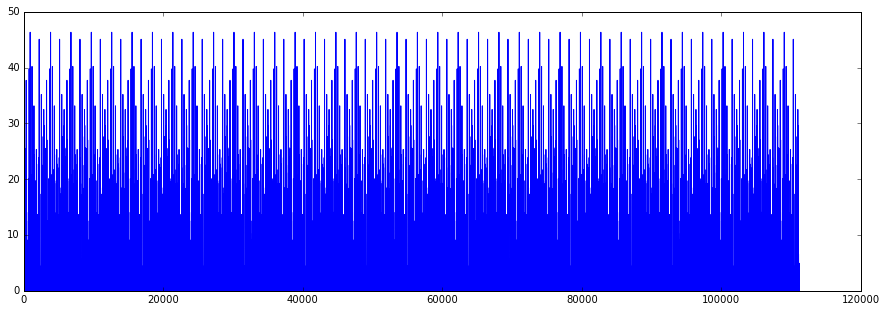

In [44]:
plt.figure(figsize=(15,5))
plt.plot(data.precip)
#plt.ylim(0,0.5)

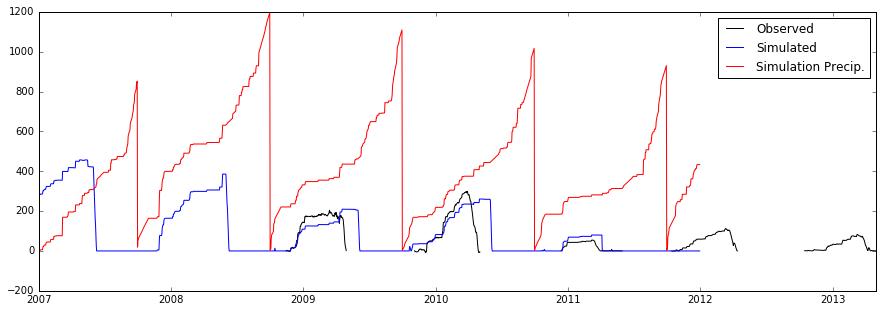

In [14]:
plt.figure(figsize=(15,5))
plt.plot(snow.index,snow.swe,'-k',label='Observed')
plt.plot(data.index,data.snowpack,'-b', lw = 1,label='Simulated')
plt.plot(data.index,data.cumulative_P,'-r',lw=1,label='Simulation Precip.')
plt.legend(loc='upper right')

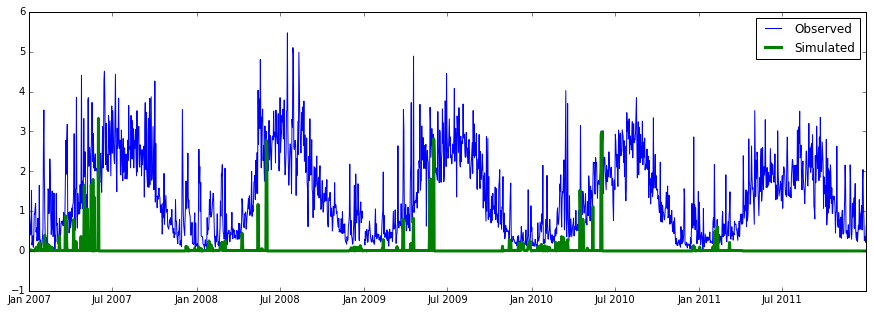

In [14]:
plt.figure(figsize=(15,5))
plt.plot(VCM.index,VCM.ET,label='Observed')
plt.plot(data.index,data.ET, lw = 3,label='Simulated')
#plt.ylim(0,5)
#plt.ylabel('LAI', fontsize=20)
#plt.title('Forest RHESSys 5.18', fontsize=25)
plt.legend(loc='upper right')

In [20]:
data.lai.describe()

count    1826
mean        0
std         0
min         0
25%         0
50%         0
75%         0
max         0
Name: lai, dtype: float64

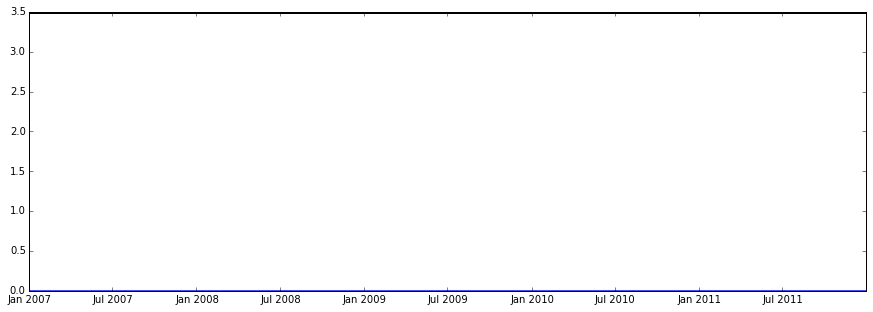

In [18]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data.lai)
#plt.ylim(0,5)
#plt.ylabel('LAI', fontsize=20)
#plt.title('Forest RHESSys 5.18', fontsize=25)
plt.axhline(3.5, c='k', lw = 4)

In [70]:
5.3/data.soilc.max()

1.0017502277564196

In [266]:
av = data.ix[int(72683-(365.25*12)):72683,'soiln'].mean()
min_v = data.ix[int(72683-(365.25*12)):72683,'soiln'].min()
max_v = data.ix[int(72683-(365.25*12)):72683,'soiln'].max()

In [267]:
(max_v - min_v) / av

0.033801572783275592

In [268]:
data.ix[int(72683-(365.25*12)):72683,'lai'].mean()

0.0095213267168605988

In [237]:
3.5/0.0654

53.51681957186544

In [67]:
int(72683-(365.25*12))

68300

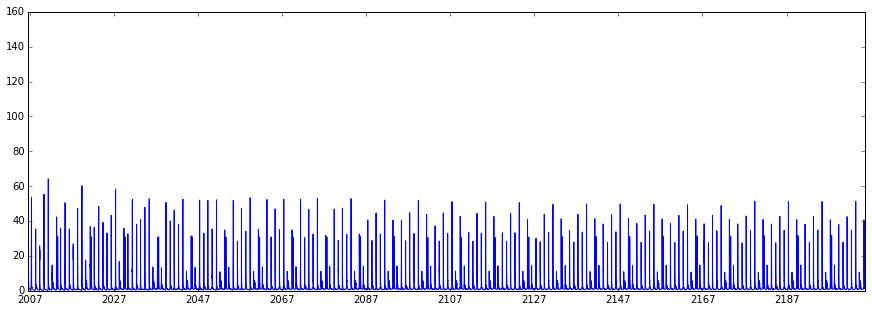

In [58]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data.streamflow)

In [106]:
(data['2093-10-1':'2103-9-30'].soilc.max()-data['2093-10-1':'2103-9-30'].soilc.min())/data['2093-10-1':'2103-9-30'].soilc.min()

AttributeError: 'DataFrame' object has no attribute 'soilc'